# Regression Predict Team NM2 Solution

© Explore Data Science Academy

---
### Honour Code

We {**UBASINACHI ELEONU, ELIZABETH AJABOR, YINKA AKINDELE, AKINBOWALE AKIN-TAYLOR, EMMANUEL MAISAJE, TOCHUKWU EZEOKAFOR**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

We understand that non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#zero>I. Problem Statement</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="zero"></a>
## I. Problem Statement

To prevent the drastic effect of climate change and ensure sustainability of the global ecosystem, the world is gradually adopting the use of renewable energy. Asides ensuring a steady supply of electricity for a productive livelihood, renewable energy sources has also led to the emergence of new energy markets, enterprises, and job opportunities.

Renewable energy sources accounted for 43% of all electricity generated in Spain in the year 2020. As a result, the government of Spain is considering an expansion of its renewable energy resource infrastructure investments. To do so, they need information on the country's renewable resource and fossil fuel energy generating trends and patterns.

Our team of data scientists have been tasked with creating a model that would help predict the three-hourly load shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain. This information will aid the government in determining how much infrastructure spending should be increased.

[Load Shortfall Image](https://dailytimes.com.pk/assets/uploads/2022/04/29/5ef6cf3f8fe3c.jpg)

![Loadshedding](https://github.com/JayHansea/TEAM-NM2/blob/65985167bb4b2ce180e3217d9b1b5356c9047a4d/Electricity%20Shortfall%20Image.jpg?raw=true)

[Image Source](https://dailytimes.com.pk/927865/pakistanis-suffer-worst-loadshedding-as-electricity-shortfall-reaches-9000mw/)



### II. OBJECTIVES

* Explore and visualize the dataset.
* Clean and engineer the dataset.
* Build several models that predicts the 3 hourly load shortfall.
* Assess the accuracy of the models.
* Choose the best model to make predictions.


### III. FEATURES DESCRIPTION
1. Time: Weather conditions in each city at a particular date and time
2. Wind_speed: Wind speed in each city
3. Wind_deg: The direction of the wind in each city
4. Pressure: Atmospheric pressure in each city
5. Rain: The amount of rain in each city in 1 hour or 3 hours
6. Snow: The amount of snowfall in each city
7. Cloud_all: Percentage cloud coverage in each city

<a href=#cont>Back to Table of Contents</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| First we import, and briefly describe the libraries that will be used throughout our analysis and modelling. |

---

In [30]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np    # for linear algebra
import pandas as pd   # Data processing, CSV file importation

# Libraries for data preparation and model building
##Accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from tqdm import tqdm
import math
import random

#Visualization Packages
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing & Previewing Data ⚡ |
| :--------------------------- |
|Here we imported the given datasets (train and test dataset) as sourced from [Kaggle](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/data). It is important to note that this dataset was first pushed to our Github repository from where it was then loaded to this notebook.

---

In [31]:
# load the train data
df_train = pd.read_csv('Data/df_train.csv')
df_train.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [32]:
# Load the test data
df_test = pd.read_csv('Data/df_test.csv')
df_test.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |

---


### Checking the "shape" of the data-sets

First, we checked the shape of both datasets, and observed that the training dataset has 49 columns while the test dataset has only 48 coulmns. The missing column from the test set is the target variable the (load_shortfall_3hr) that our model is to predict.

In [33]:
df_train.shape, df_test.shape

((8763, 49), (2920, 48))

### Features Preview

The column function was used to return the names of all the features that are present in both datasets.

In [34]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [35]:
df_test.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### Summary Statistics

The describe() function was used to generate descriptive statistics that summarizes the central tendency, dispersion 
and shape of the dataset, excluding null values.

In [36]:
# look at data statistics for df_train
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


### Splitting the dataset by cities

In the following cells, we took a deeper dive into the train dataset by splitting it into the different cities. This was done to allow us assess the impact of city specific features.

In [51]:
# Madrid
df_hist = df_train
df_Madrid = df_hist.filter(['time', 'Madrid_wind_speed','Madrid_humidity', 'Madrid_clouds_all',
'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure', 'Madrid_temp_max',
'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'])

In [52]:
# Bilbao
df_hist = df_train
df_Bilbao = df_hist.filter(['time', 'Bilbao_wind_speed','Bilbao_humidity', 'Bilbao_clouds_all',
'Bilbao_rain_1h','Bilbao_weather_id','Bilbao_pressure', 'Bilbao_temp_max',
'Bilbao_temp', 'Bilbao_temp_min', 'load_shortfall_3h'])

In [53]:
# Barcelona
df_hist = df_train
df_Barcelona = df_hist.filter(['time', 'Barcelona_wind_speed','Barcelona_humidity', 'Barcelona_clouds_all',
'Barcelona_rain_1h','Barcelona_weather_id','Barcelona_pressure', 'Barcelona_temp_max',
'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h'])

In [54]:
# Seville
df_hist = df_train
df_Seville = df_hist.filter(['time', 'Seville_wind_speed','Seville_humidity', 'Seville_clouds_all',
'Seville_rain_1h','Seville_weather_id','Seville_pressure', 'Seville_temp_max',
'Seville_temp', 'Seville_temp_min', 'load_shortfall_3h'])

In [55]:
# Valencia
df_hist = df_train
df_Valencia = df_hist.filter(['time', 'Valencia_wind_speed','Valencia_humidity', 'Valencia_clouds_all',
'Valencia_rain_1h','Valencia_weather_id','Valencia_pressure', 'Valencia_temp_max',
'Valencia_temp', 'Valencia_temp_min', 'load_shortfall_3h'])

### Features distribution by city

We generated independent histograms to evaluate the features of each city in the data set.

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

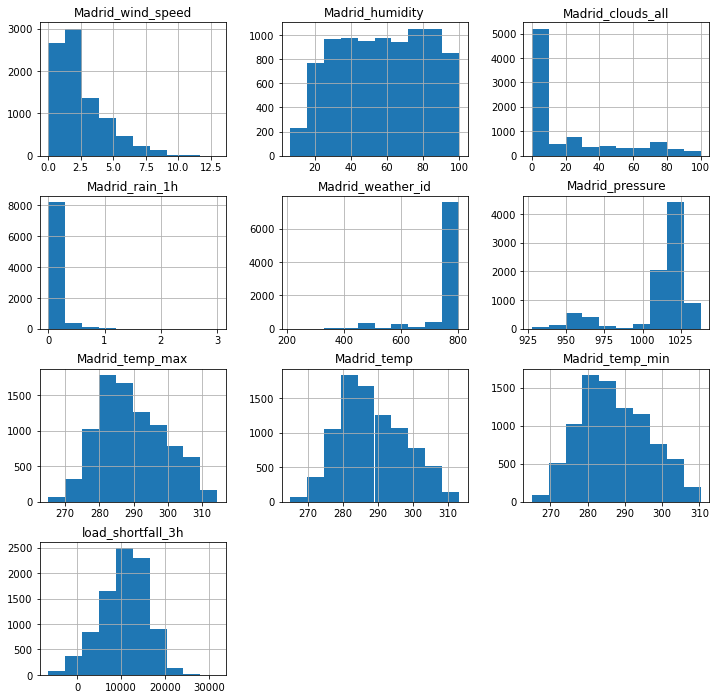

In [56]:
# Madrid
df_Madrid.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

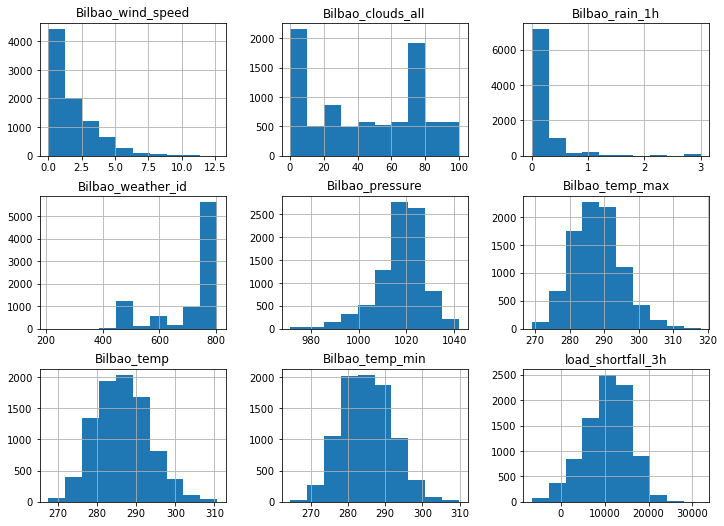

In [57]:
# Bilbao
df_Bilbao.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_weather_id'}>],
       [<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

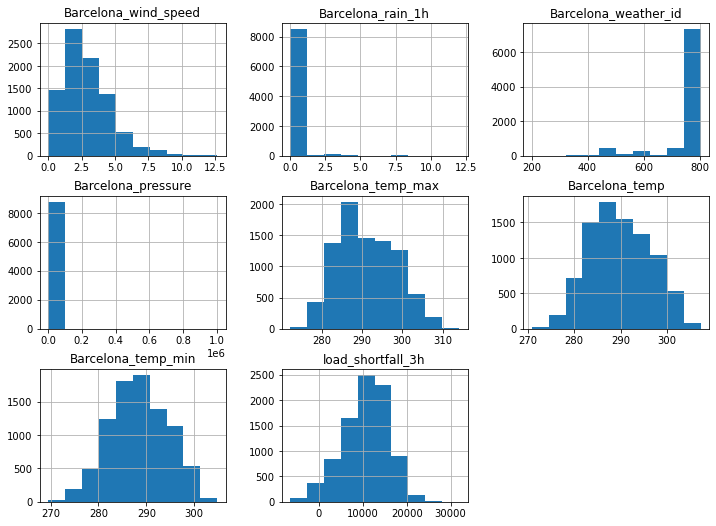

In [58]:
# Barcelona
df_Barcelona.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>,
        <AxesSubplot:title={'center':'Seville_temp_max'}>],
       [<AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

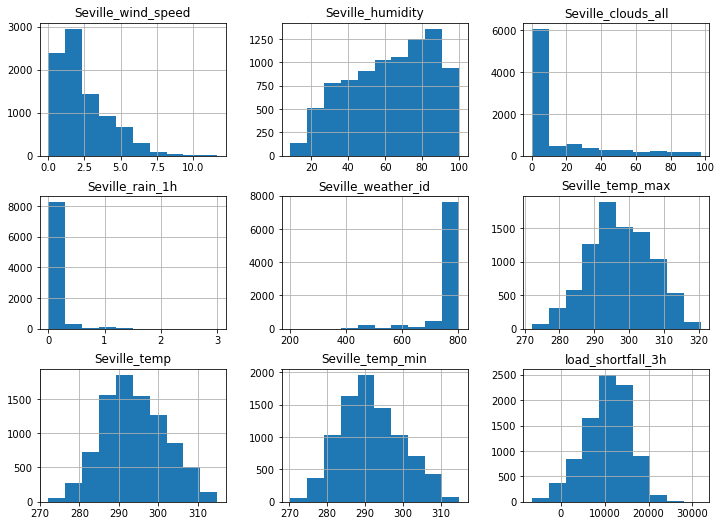

In [59]:
# Seville
df_Seville.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>],
       [<AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

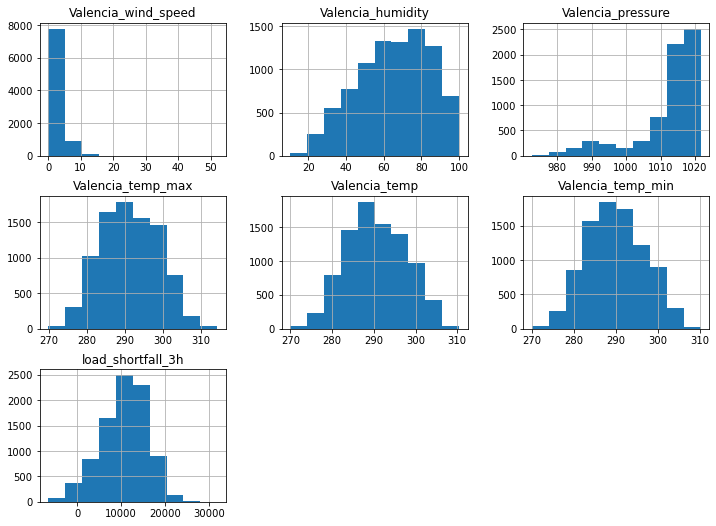

In [60]:
# Valencia
df_Valencia.hist(layout = (4,3), figsize=(12, 12))

### Evaluating correlation with the output variable

It was neccesary to evaluate the correlation of the different features with the target variable to ascertain which features have a very insignificant relationship with the target variable.

In [67]:
df_hist.corrwith(df_hist["load_shortfall_3h"]).sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Unnamed: 0              0.192612
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_ra

### Evaluating the correlation between the columns of the dataset

It was also neccesary to evaluate the different features to see how correlated they are with each other. Where multiple columns show strong correlation, only one of such features are retained and used for for the model creation, as these other features may not add any additional functionality or advantage to the model but will only serve to increase it's size and lead to slow performance. a correlation value of 1 represents a perfect positive correlation while a value equal to -1 indicates a perfect negative correlation. The further away the value is from 1 or -1, the weaker the correlation

In [68]:
# # evaluate correlation for df_train
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [69]:
# evaluate correlation for df_test
df_test.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,1.000000,-0.235888,-0.171216,-0.229930,-0.012468,-0.032478,-0.192422,-0.136715,-0.089696,-0.135484,...,0.248009,0.242473,0.248321,0.239508,0.262182,0.247846,0.289018,0.272777,0.241640,0.246385
Madrid_wind_speed,-0.235888,1.000000,0.253975,0.577509,-0.107176,-0.055267,0.164097,0.404369,0.166845,0.277087,...,-0.034217,-0.024364,-0.028548,-0.029330,-0.041190,-0.022688,-0.056954,-0.023627,-0.023591,-0.046734
Bilbao_rain_1h,-0.171216,0.253975,1.000000,0.155717,0.103573,0.149643,0.414151,0.118086,0.080647,0.183078,...,-0.207383,-0.223619,-0.202221,-0.221014,-0.239588,-0.196089,-0.258778,-0.233939,-0.218465,-0.217309
Valencia_wind_speed,-0.229930,0.577509,0.155717,1.000000,-0.214738,-0.100565,0.126358,0.423967,0.080878,0.281658,...,-0.003885,-0.004474,-0.001078,0.028977,0.015834,0.001775,-0.003910,0.030320,-0.006542,-0.033857
Seville_humidity,-0.012468,-0.107176,0.103573,-0.214738,1.000000,0.771534,0.033669,-0.172222,0.388829,-0.233416,...,-0.587597,-0.668035,-0.587903,-0.562529,-0.547807,-0.585128,-0.514154,-0.743369,-0.658135,-0.630085
Madrid_humidity,-0.032478,-0.055267,0.149643,-0.100565,0.771534,1.000000,0.005968,-0.043188,0.327895,-0.169288,...,-0.673470,-0.789474,-0.672803,-0.607507,-0.588370,-0.668369,-0.548738,-0.740434,-0.777081,-0.756214
Bilbao_clouds_all,-0.192422,0.164097,0.414151,0.126358,0.033669,0.005968,1.000000,0.001085,0.010232,0.227288,...,-0.075326,-0.102398,-0.071588,-0.128791,-0.167230,-0.067711,-0.215278,-0.132752,-0.104385,-0.108140
Bilbao_wind_speed,-0.136715,0.404369,0.118086,0.423967,-0.172222,-0.043188,0.001085,1.000000,0.138443,0.519614,...,-0.025420,-0.001129,-0.022682,0.078474,0.097111,-0.019624,0.117940,0.060728,-0.004439,-0.030676
Seville_clouds_all,-0.089696,0.166845,0.080647,0.080878,0.388829,0.327895,0.010232,0.138443,1.000000,0.007418,...,-0.166132,-0.208761,-0.158508,-0.126255,-0.123033,-0.150160,-0.114845,-0.170409,-0.206495,-0.213871
Bilbao_wind_deg,-0.135484,0.277087,0.183078,0.281658,-0.233416,-0.169288,0.227288,0.519614,0.007418,1.000000,...,0.112969,0.132334,0.114064,0.157191,0.146133,0.114486,0.124797,0.145157,0.130515,0.112450


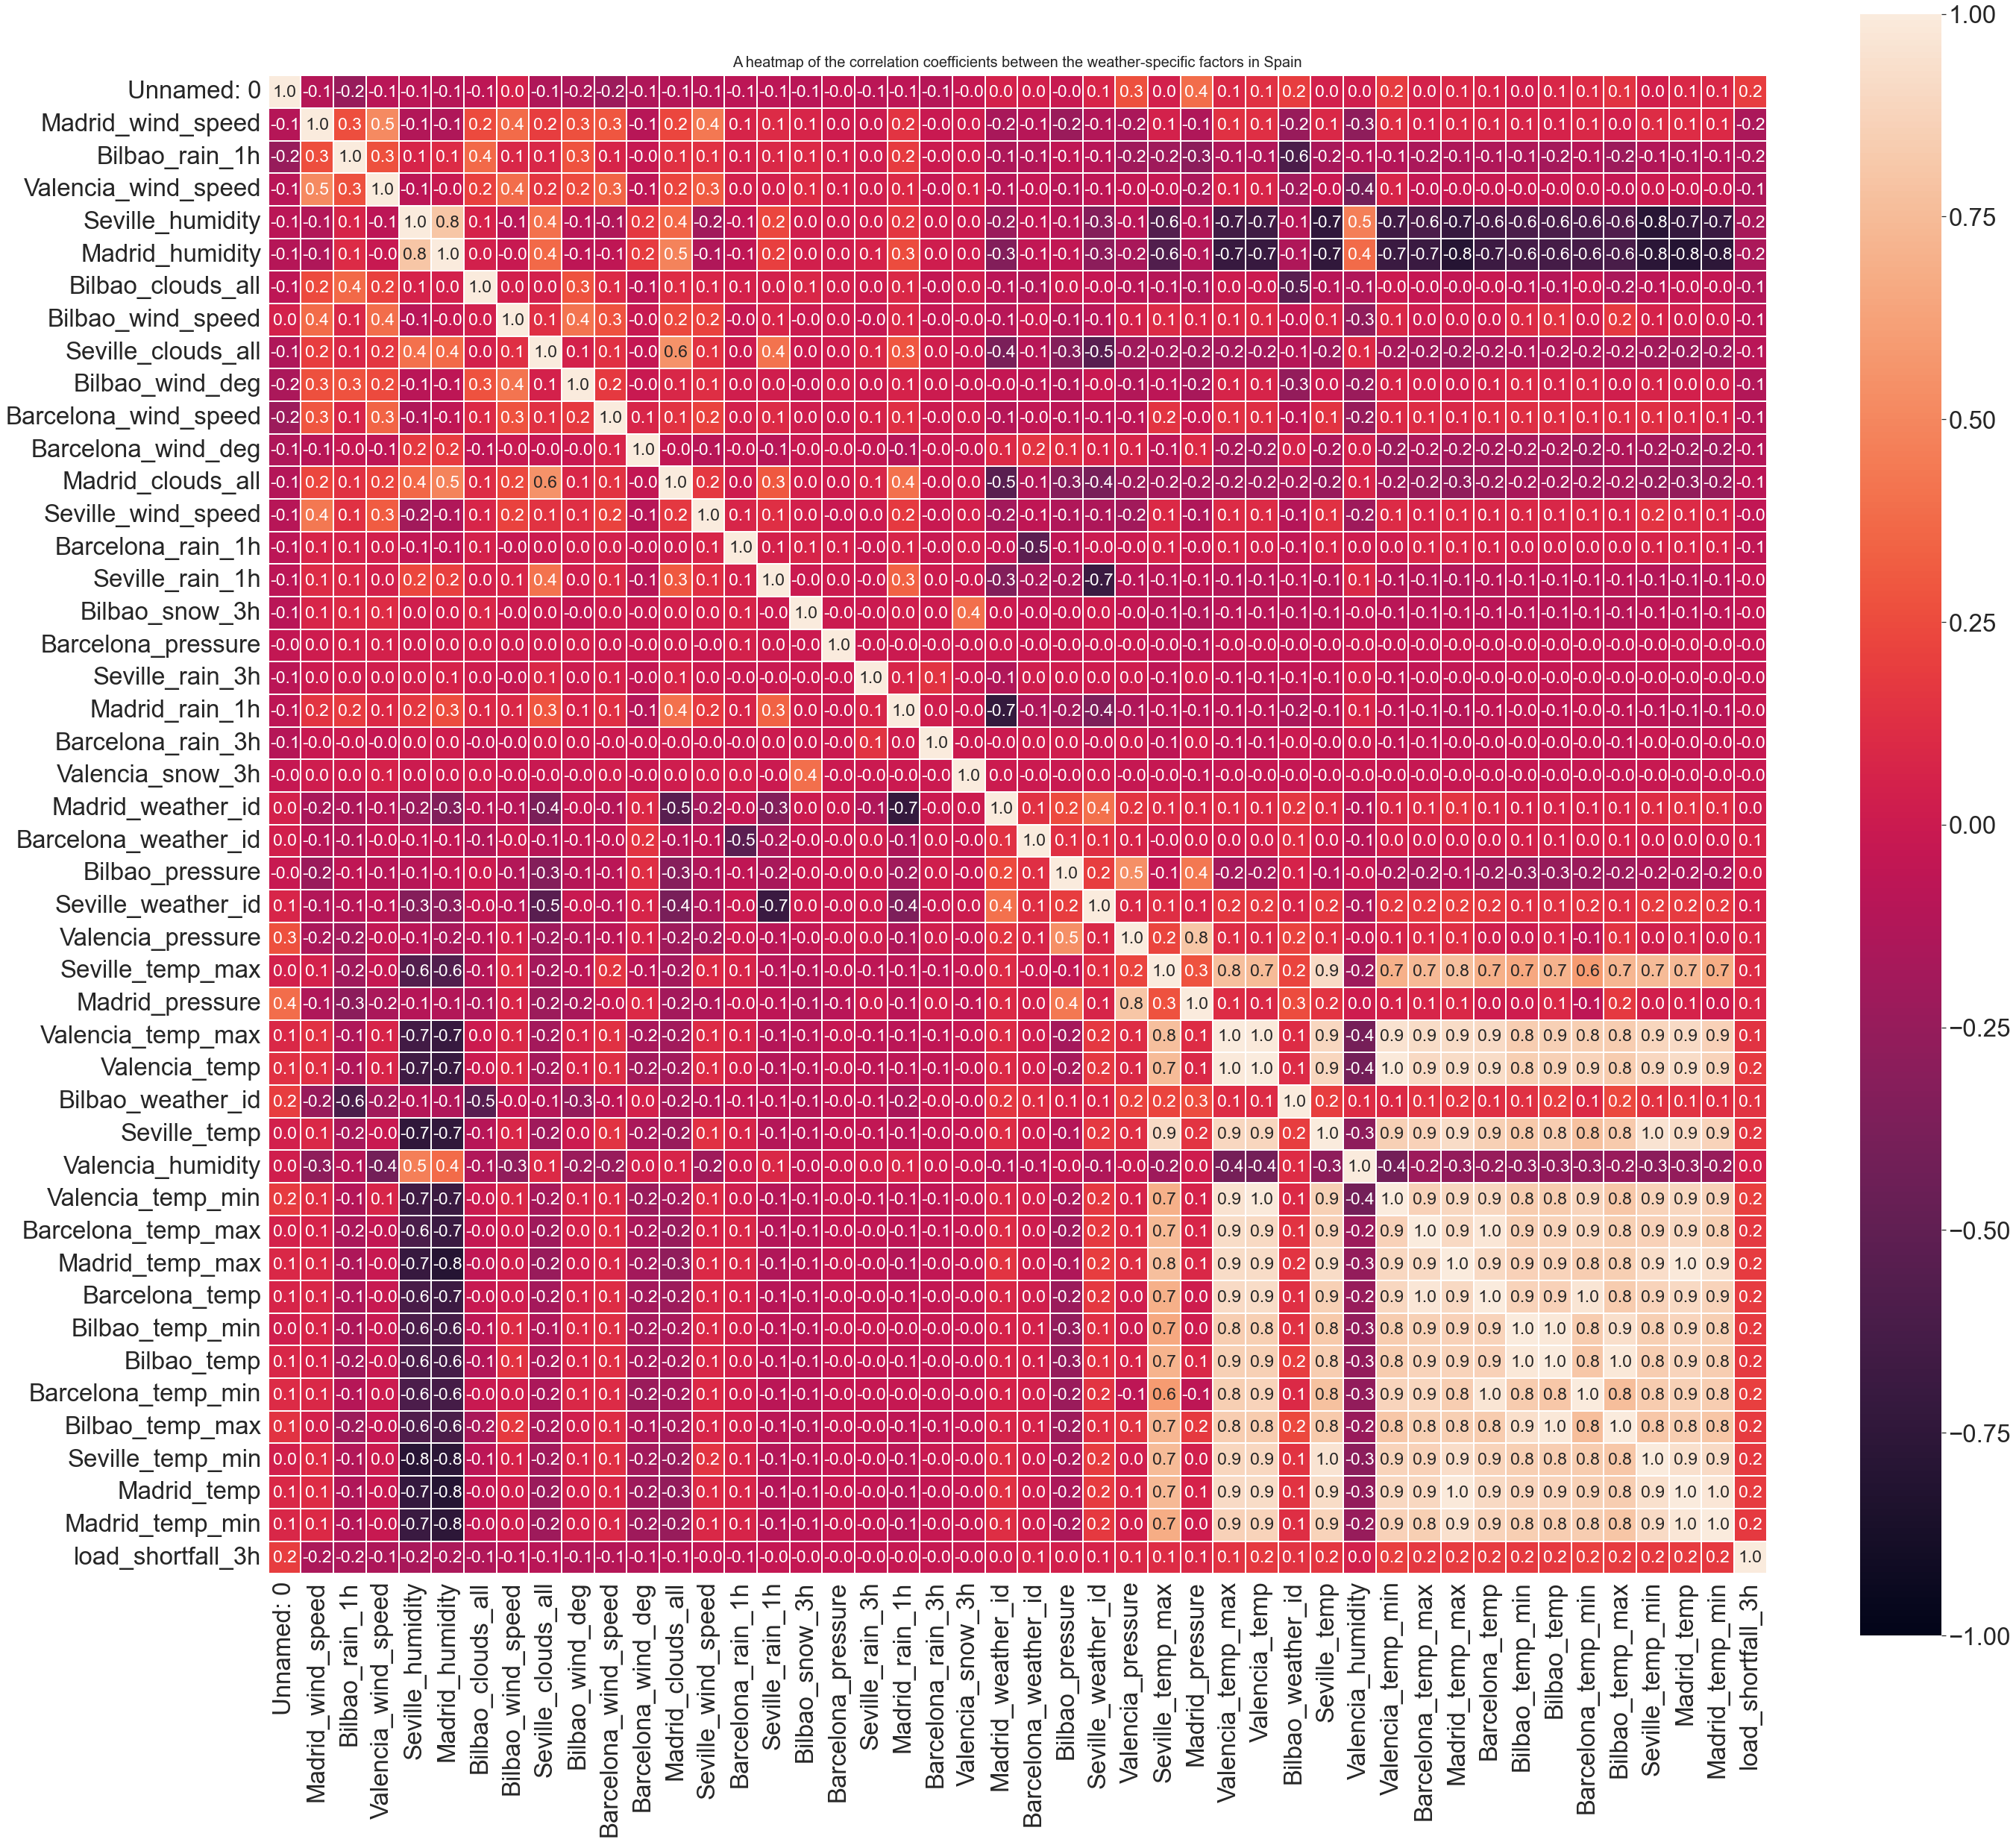

In [70]:
import matplotlib.pyplot as plt
from matplotlib import rc



plt.subplots(figsize=(45,40))



heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 23}, fmt='.1f', square=True, linecolor="w", linewidths=2)
sns.set(font_scale=3.0)



heatmap.set_title('A heatmap of the correlation coefficients between the weather-specific factors in Spain', fontdict={'fontsize': 20}, pad=12);

### THE 'ISNULL' FUNCTION
Identifying the column that has the null entries is important so it doesnt affect the performance of our model. this fuction shows us the number of null values present in the dataset. The function shows that only the Valencia_pressure has null values

In [71]:
# Identify colunm(s) that contain null values in df_train
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [72]:
# Identify colunm(s) that contain null values in df_train
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we cleaned the dataset, and created new features - as identified in the EDA phase. |

---

### Merging the dataset

We merged the two dataset given ie the train and test dataset, to ease the execution of the data cleaning phase.

In [73]:
# Merge the test and train data set to simplify your work 
merged_df = pd.concat([df_train, df_test])
merged_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [74]:
merged_df.shape

(11683, 49)

In [75]:
#dropping the 'Unamed:0' column
df = merged_df
df = df.drop(['Unnamed: 0'], axis = 1)

### Checking the head and tail of the merged dataset

Checking the head and tail of the merged dataset helped us confirm that the data represented at both the head and the tail are consistent with the data we get from the train and test dataset.

In [76]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [77]:
df.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


### Fixing null values
Identifying the column(s) with null entries is important so it doesnt affect the performance of our model. Using the isnull() function shows us the number of null values present in the dataset. The function shows that only the Valencia_pressure and load_shortfall features have null values. It is important to note that the load_shortfall_3h feature has null entries because it is the variable that is to be predicted by the model.

In [79]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

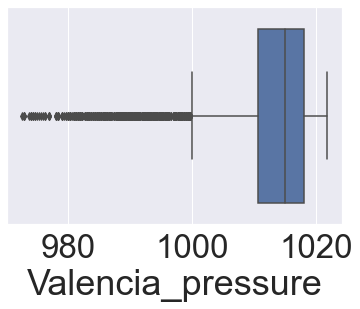

In [80]:
sns.boxplot(df['Valencia_pressure'])

In [81]:
print('Mean')
print(df['Valencia_pressure'].mean())
print('Mode')
print(df['Valencia_pressure'].mode())
print('Median')
print(df['Valencia_pressure'].median())

Mean
1012.3466870428985
Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Median
1015.0


### Choosing the measure to replace null values

As observed all three measures of central tendency have very similar values, as such there wouldn't be too much of a difference which measure we choose to go with. However, for the purpose of this model, we shalll replace the null values in "Valencia pressure" with the mean, since it is a better measure for the datatype.

In [93]:
#Replacing the null values with the mean
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode())

In [94]:
df_clean.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

### CHECK DATA TYPE

We checked to identify the data types contained in the dataset. Machine learning models only work with numeric data, which means the data types for the models must be floats or integers in order to get the best predictions out of the models built from our data.

In [95]:
df_clean.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia


As observed above, the "time", "Valencia_wind_deg" as well as the "Seville_pressure" features are all of object data type (also known as strings). These features have to be converted to floats or integers for the model to be able to make use of them as inputs. We transformed them to numeric form.

#### The time feature
We mapped this feature into a date_time format which is the appropriate data type for date/time features, then we created new features off the time feature that is usable by the model.

In [96]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [97]:
column_list =[]

# day
df_clean['Day'] = df_clean['time'].dt.day

# month
df_clean['Month'] = df_clean['time'].dt.month

# year
df_clean['Year'] = df_clean['time'].dt.year

# hour
df_clean['hour'] = df_clean['time'].dt.hour

# minute
df_clean['minute'] = df_clean['time'].dt.minute

# second
df_clean['second'] = df_clean['time'].dt.second


# adding the new features to the dataset 
column_list = ['time','Day','Month','Year','hour','minute','second'] + list(df_clean.columns[1:-6])



df_clean = df_clean[column_list]




In [98]:
#df_clean.head()

### Dropping the noise

Here we dropped features that are not useful to our model. Features dropped include the "time" column and other columns with multicollinearity as identified during the EDA phase.

In [99]:
df_modified = df_clean
df_modified = df_modified.drop([ 'time','Madrid_temp_min','Madrid_temp_max','Seville_temp_min', 'Bilbao_temp_max','Bilbao_temp_min','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Barcelona_temp_min'], axis = 1)

In [101]:
df_modified.head()

,Day,Month,Year,hour,minute,second,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,...,Seville_temp_max,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h
0,1,1,2015,3,0,0,0.666667,level_5,0.0,0.666667,...,274.254667,971.333333,269.888000,800.0,274.254667,75.666667,281.013000,269.338615,265.938000,6715.666667
1,1,1,2015,6,0,0,0.333333,level_10,0.0,1.666667,...,274.945000,972.666667,271.728333,800.0,274.945000,71.000000,280.561667,270.376000,266.386667,4171.666667
2,1,1,2015,9,0,0,1.000000,level_9,0.0,1.000000,...,278.792000,974.000000,278.008667,800.0,278.792000,65.666667,281.583667,275.027229,272.708667,4274.666667
3,1,1,2015,12,0,0,1.000000,level_8,0.0,1.000000,...,285.394000,994.666667,284.899552,800.0,285.394000,54.000000,283.434104,281.135063,281.895219,5075.666667
4,1,1,2015,15,0,0,1.000000,level_7,0.0,1.000000,...,285.513719,1035.333333,283.015115,800.0,285.513719,58.333333,284.213167,282.252063,280.678437,6620.666667


### The Valencia_wind_deg Column
The next object in the dataset is the "Valencia_wind_deg". This is recorded as levels which are denoted by the string "level" followed by a number which describes that particular level. To encode this, we can simply extract the number from the column that identifies that level. This line of code can help us to achieve that

In [103]:
df_modified['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [104]:
df_modified['Valencia_wind_deg'] = df_modified['Valencia_wind_deg'].str.extract('(\d+)')
df_modified['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

As you can see above, the data has been reduced to a number without the string "level" to define it but there is still a problem. The data type is still an object. we can convert the object to numeric form by using the pandas numeric function.

In [105]:
df_modified['Valencia_wind_deg'] = pd.to_numeric(df_modified['Valencia_wind_deg'])
df_modified.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

Repeat the process for Seville_pressure

In [106]:
df_modified['Seville_pressure'] = df_modified['Seville_pressure'].str.extract('(\d+)')

In [107]:
df_modified['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

In [108]:
df_modified['Seville_pressure'] = pd.to_numeric(df_modified['Seville_pressure'])
df_modified['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [109]:
df_modified.dtypes

Day                       int64
Month                     int64
Year                      int64
hour                      int64
minute                    int64
second                    int64
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_p

Val_wind_deg_enc = pd.get_dummies(df_modified['Valencia_wind_deg'], drop_first=True)

Val_wind_deg_enc.columns = Val_wind_deg_enc.columns.astype(str)

df_modified = df_modified.join(Val_wind_deg_enc)

In [110]:
remove_X_features = ['minute', 'second', 'Valencia_wind_deg', 'Seville_temp_max','Seville_temp', 'Madrid_temp',
                     'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Seville_pressure', 
                     'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_rain_3h', 'Seville_clouds_all', 'Madrid_clouds_all',
                     'Bilbao_snow_3h', 'Valencia_snow_3h']

df_modified = df_modified.drop(remove_X_features, axis = 1)

In [111]:
count = 0
l1 = []
l2 = []
l3 = []
l4 = []
for i in df_modified.columns:
    if count < 12:
        l1.append(i)
    elif count > 11 and count < 22:
        l2.append(i)
    elif count > 21 and count < 33:
        l3.append(i)
    else:
        l4.append(i)
    
    count = count + 1

df_modified1 = df_modified[l1]
df_modified2 = df_modified[l2]
df_modified3 = df_modified[l3]
df_modified4 = df_modified[l4]

In [112]:
df_modified1

,Day,Month,Year,hour,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed
0,1,1,2015,3,0.666667,0.666667,74.333333,64.000000,0.000000,1.000000,223.333333,6.333333
1,1,1,2015,6,0.333333,1.666667,78.333333,64.666667,0.000000,1.000000,221.000000,4.000000
2,1,1,2015,9,1.000000,1.000000,71.333333,64.333333,0.000000,1.000000,214.333333,2.000000
3,1,1,2015,12,1.000000,1.000000,65.333333,56.333333,0.000000,1.000000,199.666667,2.333333
4,1,1,2015,15,1.000000,1.000000,59.000000,57.000000,2.000000,0.333333,185.000000,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
2915,31,12,2018,9,0.333333,2.000000,81.666667,49.666667,80.000000,1.333333,70.000000,6.333333
2916,31,12,2018,12,0.333333,1.333333,61.000000,28.333333,56.666667,1.000000,36.666667,2.666667
2917,31,12,2018,15,1.000000,3.000000,47.000000,26.333333,0.000000,0.666667,14.666667,2.666667
2918,31,12,2018,18,1.000000,2.000000,52.666667,56.666667,0.000000,0.666667,19.000000,2.333333


In [132]:
df_modified2

,Barcelona_wind_deg,Seville_wind_speed,Barcelona_pressure,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp
0,42.666667,3.333333,1036.333333,800.0,800.0,1035.000000,800.0,1002.666667,971.333333,269.888000
1,139.000000,3.333333,1037.333333,800.0,800.0,1035.666667,800.0,1004.333333,972.666667,271.728333
2,326.000000,2.666667,1038.000000,800.0,800.0,1036.000000,800.0,1005.333333,974.000000,278.008667
3,273.000000,4.000000,1037.000000,800.0,800.0,1036.000000,800.0,1009.000000,994.666667,284.899552
4,260.000000,3.000000,1035.000000,800.0,800.0,1035.333333,800.0,1015.000000,1035.333333,283.015115
...,...,...,...,...,...,...,...,...,...,...
2915,320.000000,2.000000,1029.666667,800.0,800.0,1034.666667,800.0,1015.000000,1031.666667,279.323333
2916,293.333333,4.000000,1028.666667,800.0,800.0,1034.333333,800.0,1015.000000,1031.333333,290.323333
2917,233.333333,4.666667,1027.000000,800.0,800.0,1033.000000,800.0,1015.000000,1030.000000,293.483333
2918,253.333333,3.333333,1027.000000,800.0,800.0,1033.333333,800.0,1015.000000,1030.333333,285.976667


In [133]:
df_modified3

,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp,load_shortfall_3h
0,800.000000,75.666667,281.013000,269.338615,6715.666667
1,800.000000,71.000000,280.561667,270.376000,4171.666667
2,800.000000,65.666667,281.583667,275.027229,4274.666667
3,800.000000,54.000000,283.434104,281.135063,5075.666667
4,800.000000,58.333333,284.213167,282.252063,6620.666667
...,...,...,...,...,...
2915,734.333333,69.666667,278.140000,273.210000,NaN
2916,747.666667,32.000000,286.150000,278.443333,NaN
2917,800.000000,23.666667,288.820000,285.073333,NaN
2918,800.000000,59.000000,284.473333,281.626667,NaN


In [134]:
df_modified4

""
0
1
2
3
4
...
2915
2916
2917
2918


In [135]:
id_col = []
for col in df_modified.columns:
    if len(col.split('_')) > 1 and col.split('_')[-2] == 'snow':
        id_col.append(col)
        

In [136]:
id_col

[]

In [137]:
df_modified[id_col].nunique()

Series([], dtype: float64)

In [138]:
df_modified[df_modified[id_col] == 0.0][id_col].count()

Series([], dtype: int64)

In [139]:
# df_modified4['Year'].nunique()

In [140]:
df_modified[len(df_train):]

,Day,Month,Year,hour,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp,load_shortfall_3h
0,1,1,2018,0,5.000000,5.000000,87.000000,71.333333,20.000000,3.000000,...,1025.666667,800.000000,1018.0,1030.000000,287.483333,801.000000,46.333333,287.356667,280.380000,NaN
1,1,1,2018,3,4.666667,5.333333,89.000000,78.000000,0.000000,3.666667,...,1026.666667,800.000000,1015.0,1030.333333,284.150000,721.000000,53.666667,284.190000,281.010000,NaN
2,1,1,2018,6,2.333333,5.000000,89.000000,89.666667,0.000000,2.333333,...,1025.333333,800.333333,1015.0,1030.666667,282.816667,800.000000,42.000000,283.150000,279.196667,NaN
3,1,1,2018,9,2.666667,5.333333,93.333333,82.666667,26.666667,5.666667,...,1025.000000,800.333333,1015.0,1032.333333,283.483333,801.333333,45.000000,283.190000,281.740000,NaN
4,1,1,2018,12,4.000000,8.666667,65.333333,64.000000,26.666667,10.666667,...,1022.333333,800.000000,1015.0,1032.333333,287.150000,801.333333,41.000000,286.816667,284.116667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,31,12,2018,9,0.333333,2.000000,81.666667,49.666667,80.000000,1.333333,...,1034.666667,800.000000,1015.0,1031.666667,279.323333,734.333333,69.666667,278.140000,273.210000,NaN
2916,31,12,2018,12,0.333333,1.333333,61.000000,28.333333,56.666667,1.000000,...,1034.333333,800.000000,1015.0,1031.333333,290.323333,747.666667,32.000000,286.150000,278.443333,NaN
2917,31,12,2018,15,1.000000,3.000000,47.000000,26.333333,0.000000,0.666667,...,1033.000000,800.000000,1015.0,1030.000000,293.483333,800.000000,23.666667,288.820000,285.073333,NaN
2918,31,12,2018,18,1.000000,2.000000,52.666667,56.666667,0.000000,0.666667,...,1033.333333,800.000000,1015.0,1030.333333,285.976667,800.000000,59.000000,284.473333,281.626667,NaN


## Variables Selection by Correlation and Significance

In [141]:
#column_titles = [col for col in x if col != 'load_shortfall_3h'] + ['load_shortfall_3h']

NameError: name 'x' is not defined

In [142]:
from statsmodels.formula.api import ols

df_pval = df_modified[:len(df_train)].copy()

y_name = 'load_shortfall_3h'

x_names = [col for col in df_pval.columns if col != y_name]


formula_str = y_name + "~" + "+".join(x_names)
print('Formular:\n\t{}'.format(formula_str))

Formular:
	load_shortfall_3h~Day+Month+Year+hour+Madrid_wind_speed+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_pressure+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Madrid_pressure+Valencia_temp+Bilbao_weather_id+Valencia_humidity+Barcelona_temp+Bilbao_temp


In [143]:
model = ols(formula=formula_str, data=df_pval)

fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     58.03
Date:                Wed, 25 May 2022   Prob (F-statistic):          6.21e-278
Time:                        13:44:39   Log-Likelihood:                -86746.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8736   BIC:                         1.737e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.561e+06 

In [144]:
corr_values = df_pval.corr()['load_shortfall_3h'].sort_values(ascending=False)

corr_values

load_shortfall_3h       1.000000
Month                   0.199048
Barcelona_temp          0.182673
Bilbao_temp             0.176411
Valencia_temp           0.173225
Bilbao_weather_id       0.145875
hour                    0.139285
Year                    0.131324
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.084220
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Barcelona_pressure     -0.034385
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Seville_humidity       -0.167290
Name: load_shortfall_3h, dtype: float64

In [145]:
from scipy.stats import pearsonr

dict_corr_p = {}

column_titles_pr = [col for col in corr_values.index if col not in ['load_shortfall_3h', 'minute', 'second']]
for col in column_titles_pr:
    p_val = round(pearsonr(df_pval[col], df_pval['load_shortfall_3h'])[1], 6)
    dict_corr_p[col] = {'Correlation coefficient': corr_values[col],
                       'P_Value': p_val}
    
df_corr_p = pd.DataFrame(dict_corr_p).T
df_corr_p_sorted = df_corr_p.sort_values('P_Value')
df_corr_p_sorted[df_corr_p_sorted['P_Value']<0.1]

,Correlation coefficient,P_Value
Month,0.199048,0.000000
Madrid_humidity,-0.150536,0.000000
Valencia_wind_speed,-0.142791,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_wind_speed,-0.150981,0.000000
Seville_weather_id,0.061104,0.000000


### Test for Multicollinearity

In [146]:
x_names_sig = list(df_corr_p.index)

x_data = x[x_names_sig]

m_col = x_data.corr()

r, c = np.where(np.abs(m_col)>0.9)

off_diagonal = np.where(r != c)

multicol_df = m_col.iloc[r[off_diagonal], c[off_diagonal]]

NameError: name 'x' is not defined

In [147]:
multicol_df

NameError: name 'multicol_df' is not defined

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created two models that enable us to accurately predict the thee hour load shortfall. |

---



In [148]:
# split data to train and test data
y = df_modified[:len(df_train)][['load_shortfall_3h']]
x = df_modified[:len(df_train)].drop('load_shortfall_3h',axis=1)

In [149]:
x.head()

,Day,Month,Year,hour,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp
0,1,1,2015,3,0.666667,0.666667,74.333333,64.000000,0.0,1.000000,...,800.0,1035.000000,800.0,1002.666667,971.333333,269.888000,800.0,75.666667,281.013000,269.338615
1,1,1,2015,6,0.333333,1.666667,78.333333,64.666667,0.0,1.000000,...,800.0,1035.666667,800.0,1004.333333,972.666667,271.728333,800.0,71.000000,280.561667,270.376000
2,1,1,2015,9,1.000000,1.000000,71.333333,64.333333,0.0,1.000000,...,800.0,1036.000000,800.0,1005.333333,974.000000,278.008667,800.0,65.666667,281.583667,275.027229
3,1,1,2015,12,1.000000,1.000000,65.333333,56.333333,0.0,1.000000,...,800.0,1036.000000,800.0,1009.000000,994.666667,284.899552,800.0,54.000000,283.434104,281.135063
4,1,1,2015,15,1.000000,1.000000,59.000000,57.000000,2.0,0.333333,...,800.0,1035.333333,800.0,1015.000000,1035.333333,283.015115,800.0,58.333333,284.213167,282.252063


In [150]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [151]:
# Training Data Splitting to give Cross Validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=50)

### Create One or More ML Models

First we created a base model. In this case, our base model is a simple linear regression model.

### LINEAR MODEL

In [152]:
# Declare the model object
lm = LinearRegression()

# fit linear model
lm.fit(x_train, y_train)

prediction_lm = lm.predict(x_test)

# Extract the coefficient, or gradient, of our linear model
coefficents_lm = lm.coef_.T

#coefficents_lm = pd.DataFrame(coefficents_lm, X.columns, columns=['Coefficients'])
#coefficents_lm

### RANDOM FOREST REGRESSION
Random forests or random decision forests is an ensemble learning method for classification, regression. We opted to use the random forest regression model. In the following cells, the random forest regression model will be loaded, trained and used for predicting the load shortfall from the given data set.

In [153]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
Rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
# Rfr.fit(x, y)


Rfr.fit(x_train, np.ravel(y_train))

RandomForestRegressor(random_state=0)

### LASSO REGRESSION

In [154]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(x_train, y_train)

coefficents_lasso = pd.DataFrame(lasso.coef_, x.columns, columns=['Lasso Coefficients'])

#coefficents_lasso

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we compared the relative performance of the various trained ML models on a holdout dataset and indicated which is the best and why. |

---

### The root mean square value (RMSE)

The root mean squared error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the actual values observed. It is a very useful tool in telling how well the model predicted the values using the test dataset. Below is a function that calculates and returns the
average RMSE of the model.

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [156]:
# Compare model performance
# LINEAR REGRESSION MODEL

## TRAIN
prediction_lm_train = lm.predict(x_train)
MSE_lm_train = mean_squared_error(y_train, prediction_lm_train)
R_2_lm_train = r2_score(y_train, prediction_lm_train)
RMSE_lm_train = np.sqrt(MSE_lm_train)


## TEST
prediction_lm_test = lm.predict(x_test)
MSE_lm_test = mean_squared_error(y_test, prediction_lm_test)
R_2_lm_test = r2_score(y_test, prediction_lm_test)
RMSE_lm_test = np.sqrt(MSE_lm_test)



# REGRESSION MODEL USING RANDOM FOREST
## TRAIN
prediction_Rfr_train = Rfr.predict(x_train)
MSE_Rfr_train = mean_squared_error(y_train, prediction_Rfr_train)
R_2_Rfr_train = r2_score(y_train, prediction_Rfr_train)
RMSE_Rfr_train = np.sqrt(MSE_Rfr_train)


## TEST
predictions_Rfr_test = Rfr.predict(x_test)
MSE_Rfr_test = mean_squared_error(y_test, predictions_Rfr_test)
R_2_Rfr_test = r2_score(y_test, predictions_Rfr_test)
RMSE_Rfr_test = np.sqrt(MSE_Rfr_test)


# LASSO REGRESSION MODEL
## TRAIN
prediction_lasso_train = lasso.predict(x_train)
MSE_lasso_train = mean_squared_error(y_train, prediction_lasso_train)
R_2_lasso_train = r2_score(y_train, prediction_lasso_train)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)


## TEST
predictions_lasso_test = lasso.predict(x_test)
MSE_lasso_test = mean_squared_error(y_test, predictions_lasso_test)
R_2_lasso_test = r2_score(y_test, predictions_lasso_test)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

In [157]:
# dictionary of results

results_dict = {'Training R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_train,
                           # "Linear Regression Model p_val": R_2_lm_corr_pval_train,
                            "LASSO": R_2_lasso_train,
                            "Random Forest": R_2_Rfr_train
                        },
                
                    'Test R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_test,
                            #"Linear Regression Model p_val": R_2_lm_corr_pval_test,
                           "LASSO": R_2_lasso_test,
                            "Random Forest": R_2_Rfr_test
                        },
                
                    'Training RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_train,
                         #   "Linear Regression Model p_val": RMSE_lm_corr_pval_train,
                            "LASSO": RMSE_lasso_train,
                            "Random Forest": RMSE_Rfr_train
                        },
                
                    'Test RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_test,
                          #  "Linear Regression Model p_val": RMSE_lm_corr_pval_test,
                           "LASSO": RMSE_lasso_test,
                            "Random Forest": RMSE_Rfr_test
                        }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

pd.options.display.float_format = "{:,.5f}".format
results_df = results_df.astype(float)

In [158]:
results_df

,Training R-Square Score,Test R-Square Score,Training RMSE,Test RMSE
Linear Regression Model,0.14051,0.16995,"4,808.62803","4,863.66886"
LASSO,0.14051,0.16994,"4,808.62847","4,863.71227"
Random Forest,0.94855,0.67118,"1,176.48701","3,061.21031"


### Making a Kaggle submission

We converted the model with a better performance to a CSV file and exported for submission on Kaggle. The Random Forest model appears to be the better model, considering it gives a lower rmse value and a better r_2 score, hence our selection for submission. 

In [159]:
# for Submission
x_train = df_modified[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_modified[len(df_train):].drop('load_shortfall_3h',axis=1)

In [160]:
# FIT LINEAR MODEL
lm.fit(x_train, y)
preds = lm.predict(x_test)

In [161]:
pred_y = pd.DataFrame(preds, columns = ['load_shortfall_3h'])
pred_y.head()

,load_shortfall_3h
0,"7,776.61424"
1,"7,468.38416"
2,"8,192.45268"
3,"8,537.57872"
4,"7,625.20333"


In [162]:
# LASSO REGRESSION
lasso.fit(x_train, np.ravel(y))
preds_lasso = lasso.predict(x_test)

In [163]:
pred_ry= pd.DataFrame(preds_lasso,columns= ['load_shortfall_3h'])
pred_ry.head()

,load_shortfall_3h
0,"7,774.45663"
1,"7,466.58109"
2,"8,189.65913"
3,"8,537.19906"
4,"7,625.78794"


In [164]:
# Output for the Linear Regression Model 
#output = pd.DataFrame({'time':df_test['time']})
#team_submission_Lr = output.join(pred_y)
#team_submission_Lr.to_csv('team_submission_Lr.csv', index = False)

In [166]:
# Output for the Linear Regression Model 
#output_lasso = pd.DataFrame({'time':df_test['time']})
#team_submission_lasso = output_lasso.join(pred_ry)
#team_submission_lasso.to_csv('team_submission_lasso.csv', index = False)

In [168]:
# FOR RANDOM REGRESSION MODEL Rfr.fit(x_train, y)
Rfr.fit(x_train, np.ravel(y))
preds_Rfr = Rfr.predict(x_test)

In [169]:
pred_ry= pd.DataFrame(preds_Rfr,columns= ['load_shortfall_3h'])
pred_ry.head()

,load_shortfall_3h
0,"10,048.76667"
1,"8,224.95667"
2,"7,813.82000"
3,"10,691.65000"
4,"12,136.85333"


In [170]:
y

,load_shortfall_3h
0,"6,715.66667"
1,"4,171.66667"
2,"4,274.66667"
3,"5,075.66667"
4,"6,620.66667"
...,...
8758,-28.33333
8759,"2,266.66667"
8760,822.00000
8761,-760.00000


In [171]:
# Output for the Ranom Forest Regression ( Our Best Result)
output_Rfr = pd.DataFrame({'time':df_test['time']})
team_submission_Rfr = output_Rfr.join(pred_ry)
team_submission_Rfr.to_csv('team_submission_Rfr.csv', index = False)

In [172]:
team_submission_Rfr

,time,load_shortfall_3h
0,2018-01-01 00:00:00,"10,048.76667"
1,2018-01-01 03:00:00,"8,224.95667"
2,2018-01-01 06:00:00,"7,813.82000"
3,2018-01-01 09:00:00,"10,691.65000"
4,2018-01-01 12:00:00,"12,136.85333"
...,...,...
2915,2018-12-31 09:00:00,"15,137.48333"
2916,2018-12-31 12:00:00,"13,073.24333"
2917,2018-12-31 15:00:00,"11,597.27333"
2918,2018-12-31 18:00:00,"13,638.93000"


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Three Models were Modelled
1) The Linear Regression Model which is our base model
2) The Lasso regression Model which gives a better model to the Linear Regression model, then
3) The Random Regression which gives a better prediction as the R-Square  tends closer to 1 and also gives a lower RMSE value as compared to the other 2  models


In [174]:
results_df

,Training R-Square Score,Test R-Square Score,Training RMSE,Test RMSE
Linear Regression Model,0.14051,0.16995,"4,808.62803","4,863.66886"
LASSO,0.14051,0.16994,"4,808.62847","4,863.71227"
Random Forest,0.94855,0.67118,"1,176.48701","3,061.21031"
